In [2]:
import pandas as pd
from scipy.io import loadmat
import numpy as np


# Visualizations Libraries
import matplotlib.pyplot as plt

In [3]:
water_df = pd.read_csv("water_potability.csv")

In [4]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
water_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
water_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Split data

In [7]:
from sklearn.model_selection import train_test_split

# Buat input & output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = water_df,
                          target_column = "Potability")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 123)

CHeck distribution again

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

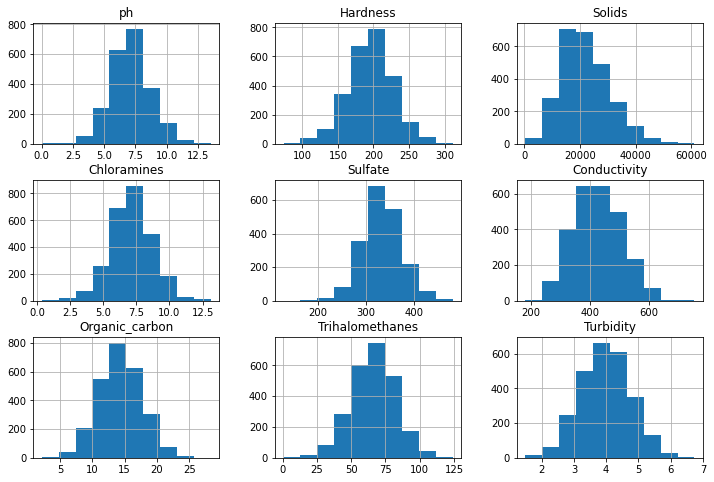

In [8]:
X_train.hist(figsize=(12,8))

# missing data treatment

In [9]:
# Buat imputer untuk data kosong
from sklearn.impute import SimpleImputer

def imputer(data, imputer = None):
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [10]:
X_train_imputed, imputer_num = imputer(data = X_train)

In [11]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2620 entries, 1318 to 2476
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
dtypes: float64(9)
memory usage: 204.7 KB


# scalling data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
def standardizeData(data, scaler = None):
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler


In [14]:
X_train_scaled, scaler = standardizeData(data = X_train_imputed)
X_train_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1318,-0.250919,0.836794,2.223633,0.388450,-1.731532,0.473789,-0.355349,-0.325827,-1.344819
1979,0.075335,-1.498724,1.741746,-0.916769,-1.508196,-0.370563,-0.307049,-0.163790,-0.113956
1239,-0.192223,0.420849,1.207204,0.185197,0.221352,-1.066187,0.715565,-1.506321,0.550324
946,-0.798091,-0.294544,2.544378,-0.325337,0.234280,-1.894062,-0.477357,-0.426915,0.322541
1032,1.098024,-0.918694,0.656343,-1.122932,1.088495,-0.400665,-0.180357,0.555362,0.266522


# transform X_test data

In [15]:
def transformTestData(data, imputer_num, scaler):
    
    # 1. Handling num
    data_imputed, _ = imputer(data = data,
                            imputer = imputer_num)
                            
    
    # 2. Scale data
    data_clean, _ = standardizeData(data = data_imputed,
                                    scaler = scaler)

    return data_clean


In [16]:
X_test_clean = transformTestData(data = X_test,
                                 imputer_num = imputer_num,
                                 scaler = scaler)

X_test_clean.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3202,1.130055,0.049891,2.143178,-0.480226,-0.629257,-1.237483,-0.553787,0.012565,0.187699
2474,-1.454939,-0.862040,-0.485894,1.638974,0.011197,-0.904054,0.882566,0.064974,1.010200
1972,-0.820063,-1.757109,-1.245520,-1.147513,0.169854,0.257557,-1.134302,1.480883,-0.845225
1937,-0.553697,-1.108907,-0.553958,-0.251847,-0.784981,-0.016584,0.007427,-1.573811,0.621207
1639,-0.227522,0.681372,0.064497,0.042287,-0.796511,-0.538096,1.345807,-0.782858,-0.425280
2035,-0.908037,-0.404301,0.005998,1.151281,-0.009943,-0.611720,-1.140200,-0.184431,-0.920232
3219,-0.460818,0.419824,1.135897,0.084583,-0.330681,-1.695083,-0.893837,0.004694,0.304605
1840,-0.035031,1.387951,-1.197462,-1.018720,-1.828491,-1.275975,-1.704219,1.416927,-0.217386
2711,0.382385,1.341713,-0.754792,1.135496,1.121190,-0.005516,1.059425,0.004694,0.091386
903,0.816452,0.012838,-0.326638,0.144205,0.270514,-0.458042,-0.059584,0.439420,1.876286


# imbalance data treatment

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
# Buat objek
smt  = SMOTE(sampling_strategy = "minority",
            random_state = 123)

# Fit objek
X_train_clean, y_train = smt.fit_resample(X_train_scaled, y_train)

In [19]:
y_train.value_counts(normalize = True)

0    0.5
1    0.5
Name: Potability, dtype: float64

# modelling

choose baseline score fot out model to beat

In [20]:
y_test.value_counts(normalize = True)

0    0.609756
1    0.390244
Name: Potability, dtype: float64

we need to make out model better than 61% accuracy 

In [21]:
# Import library
from sklearn.linear_model import LogisticRegression

In [22]:
# custom scorer for GridSearchCV
from sklearn.metrics import precision_score, make_scorer
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label=1)

In [23]:
# Buat objek
logreg = LogisticRegression( solver = "liblinear",
                            random_state = 123)
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

# Lakukan Fitting Data
logreg_cv.fit(X = X_train_clean,
              y = y_train)
# Best params
logreg_cv.best_params_

{'C': 0.01438449888287663, 'penalty': 'l2'}

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score

              precision    recall  f1-score   support

           0       0.53      0.54      0.54      1598
           1       0.53      0.52      0.53      1598

    accuracy                           0.53      3196
   macro avg       0.53      0.53      0.53      3196
weighted avg       0.53      0.53      0.53      3196



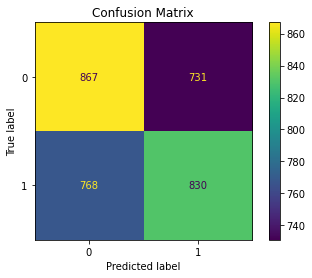

In [25]:
# best model
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            solver = "liblinear",
                            random_state = 123)

#fit train data
logreg.fit(X_train_clean, y_train)

# predict test data
predicted_logreg_train = logreg.predict(X_train_clean)

# evaluate
print(classification_report(y_train, predicted_logreg_train))

cm = confusion_matrix(y_train, predicted_logreg_train)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       400
           1       0.38      0.45      0.41       256

    accuracy                           0.50       656
   macro avg       0.49      0.49      0.49       656
weighted avg       0.52      0.50      0.51       656



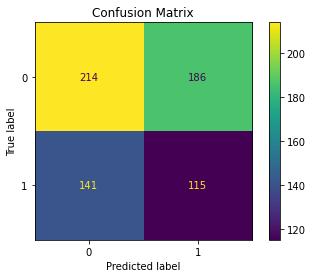

In [26]:
# predict test data
predicted_logreg_test = logreg.predict(X_test_clean)

# evaluate
print(classification_report(y_test, predicted_logreg_test))

cm = confusion_matrix(y_test, predicted_logreg_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


# knn

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
params = {"n_neighbors": [3,5,7,9,13,15,17,19],
          'weights':['uniform','distance'],
          'algorithm':['ball_tree','kd_tree', 'brute'],
          'p':[1,2]}

# Buat gridsearch
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator = knn,
                       param_grid = params,
                       scoring=custom_scorer,
                       cv = 5)

knn_cv.fit(X = X_train_clean,
           y = y_train)

knn_cv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1598
           1       1.00      1.00      1.00      1598

    accuracy                           1.00      3196
   macro avg       1.00      1.00      1.00      3196
weighted avg       1.00      1.00      1.00      3196



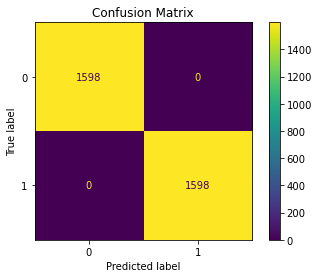

In [29]:
# best model
knn = KNeighborsClassifier(algorithm=knn_cv.best_params_['algorithm'],
                           n_neighbors=knn_cv.best_params_['n_neighbors'],
                           p=knn_cv.best_params_['p'],
                           weights=knn_cv.best_params_['weights'])

# fit train data
knn.fit(X = X_train_clean,
        y = y_train)

# predict train data
predicted_knn_train = knn.predict(X_train_clean)

# evaluate
print(classification_report(y_train, predicted_knn_train))

cm = confusion_matrix(y_train, predicted_knn_train)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       400
           1       0.49      0.54      0.51       256

    accuracy                           0.60       656
   macro avg       0.58      0.59      0.58       656
weighted avg       0.61      0.60      0.60       656



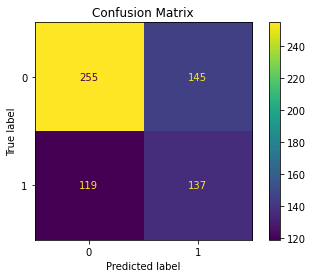

In [30]:
predicted_knn_test = knn.predict(X_test_clean)

# evaluate
print(classification_report(y_test, predicted_knn_test))

cm = confusion_matrix(y_test, predicted_knn_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


# tree based model

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
params = {"max_depth": [9,10,11,12,15,20,30,40,50,70,90,100,200],
          'criterion':['gini','entropy']}

# Buat gridsearch
tree_DC = DecisionTreeClassifier(random_state = 123)

tree_cv = GridSearchCV(estimator = tree_DC,
                       param_grid = params,
                       scoring=custom_scorer,
                       cv = 5)

# Fit grid search cv
tree_cv.fit(X_train_clean, y_train)

# Best params
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 11}

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1598
           1       0.81      0.86      0.84      1598

    accuracy                           0.83      3196
   macro avg       0.83      0.83      0.83      3196
weighted avg       0.83      0.83      0.83      3196



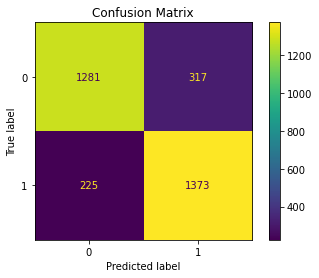

In [33]:
# best model
tree_DC = DecisionTreeClassifier(max_depth = tree_cv.best_params_["max_depth"],
                             criterion = tree_cv.best_params_["criterion"],
                             random_state = 123)

#fit
tree_DC.fit(X_train_clean, y_train)

# Predict
predicted_DC_train = tree_DC.predict(X_train_clean)

# evaluate
print(classification_report(y_train, predicted_DC_train))

cm = confusion_matrix(y_train, predicted_DC_train)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       400
           1       0.47      0.59      0.52       256

    accuracy                           0.58       656
   macro avg       0.58      0.58      0.57       656
weighted avg       0.60      0.58      0.58       656



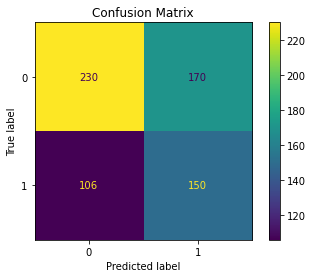

In [34]:
# predict test data
predicted_DC_test = tree_DC.predict(X_test_clean)

# evaluate
print(classification_report(y_test, predicted_DC_test))

cm = confusion_matrix(y_test, predicted_DC_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


##### ensemble model

In [1]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

In [53]:
params = {"n_estimators": [60,70,80,100,200,300,400,500], }

# Buat objek
tree = DecisionTreeClassifier(max_depth = 3)
ada_tree = AdaBoostClassifier(base_estimator = tree,
                             random_state = 123)

# Buat gridsearch
ada_tree_cv = GridSearchCV(estimator = ada_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = custom_scorer)

# Fit grid search cv
ada_tree_cv.fit(X_train_clean, y_train)

# Best params
ada_tree_cv.best_params_'learning_rate':[0.1,0.3,0.5,0.7,1]

{'learning_rate': 0.1, 'n_estimators': 400}

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1598
           1       0.94      0.95      0.94      1598

    accuracy                           0.94      3196
   macro avg       0.94      0.94      0.94      3196
weighted avg       0.94      0.94      0.94      3196



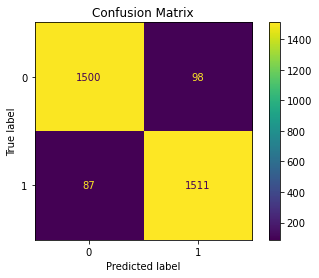

In [54]:
# best model
ada_tree = AdaBoostClassifier(n_estimators = ada_tree_cv.best_params_['n_estimators'],
                                learning_rate = ada_tree_cv.best_params_['learning_rate'],
                                base_estimator = tree,
                                random_state = 123)

#fit
ada_tree.fit(X_train_clean, y_train)

# Predict
predicted_ada_train = ada_tree.predict(X_train_clean)

# evaluate
print(classification_report(y_train, predicted_ada_train))

cm = confusion_matrix(y_train, predicted_ada_train)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.61      0.65       400
           1       0.48      0.55      0.51       256

    accuracy                           0.59       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.59      0.60       656



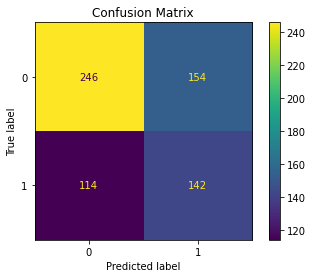

In [55]:
# predict test data
predicted_ada_test = ada_tree.predict(X_test_clean)

# evaluate
print(classification_report(y_test, predicted_ada_test))

cm = confusion_matrix(y_test, predicted_ada_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


#### bagging

In [50]:
params = {"n_estimators": [60,70,80,100,200,300,400,500]}

# Buat objek
tree = DecisionTreeClassifier()
bagging_tree = BaggingClassifier(base_estimator = tree,
                                  random_state = 123)

# Buat gridsearch
bagging_cv = GridSearchCV(estimator = bagging_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = custom_scorer)

# Fit grid search cv
bagging_cv.fit(X_train_clean, y_train)

# Best params
bagging_cv.best_params_

{'n_estimators': 200}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1598
           1       1.00      1.00      1.00      1598

    accuracy                           1.00      3196
   macro avg       1.00      1.00      1.00      3196
weighted avg       1.00      1.00      1.00      3196



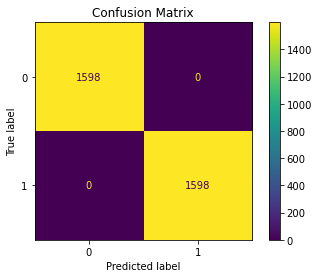

In [51]:
# best model
bagging_tree = BaggingClassifier(n_estimators = bagging_cv.best_params_['n_estimators'],
                                  base_estimator = tree,
                                  random_state = 123)

#fit
bagging_tree.fit(X_train_clean, y_train)

# Predict
predicted_bagging_train = bagging_tree.predict(X_train_clean)

# evaluate
print(classification_report(y_train, predicted_bagging_train))

cm = confusion_matrix(y_train, predicted_bagging_train)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       400
           1       0.55      0.52      0.53       256

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.64      0.64       656



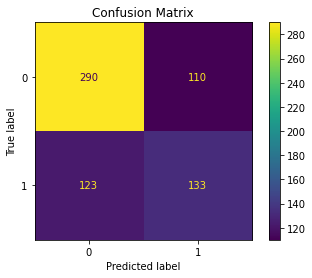

In [52]:
# predict test data
predicted_bagging_test = bagging_tree.predict(X_test_clean)

# evaluate
print(classification_report(y_test, predicted_bagging_test))

cm = confusion_matrix(y_test, predicted_bagging_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


# gradientboosting

In [27]:
from sklearn.model_selection import GridSearchCV
# custom scorer for GridSearchCV
from sklearn.metrics import precision_score, make_scorer
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label=1)

In [28]:
params = {"n_estimators": [60,70,80,100,200,300,400,500], 'criterion':['friedman_mse', 'squared_error'], 'learning_rate':[0.1,0.3,0.5,0.7,1]}

# Buat objek
GD_tree = GradientBoostingClassifier(random_state = 123)

# Buat gridsearch
GD_cv = GridSearchCV(estimator = GD_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = custom_scorer)

# Fit grid search cv
GD_cv.fit(X_train_clean, y_train)

# Best params
GD_cv.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1598
           1       0.83      0.82      0.83      1598

    accuracy                           0.83      3196
   macro avg       0.83      0.83      0.83      3196
weighted avg       0.83      0.83      0.83      3196



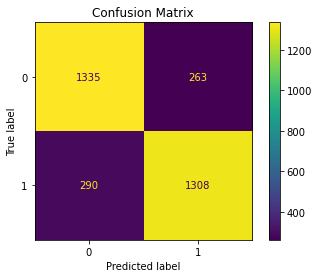

In [31]:
# best model
GD_tree = GradientBoostingClassifier(n_estimators = GD_cv.best_params_['n_estimators'],
                                  criterion = GD_cv.best_params_['criterion'],
                                  learning_rate = GD_cv.best_params_['learning_rate'],
                                  random_state = 123)

#fit
GD_tree.fit(X_train_clean, y_train)

# Predict
predicted_GD_train = GD_tree.predict(X_train_clean)

# evaluate
print(classification_report(y_train, predicted_GD_train))

cm = confusion_matrix(y_train, predicted_GD_train)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       400
           1       0.51      0.57      0.54       256

    accuracy                           0.62       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.63      0.62      0.62       656



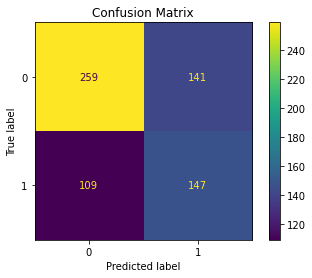

In [32]:
# predict test data
predicted_GD_test = GD_tree.predict(X_test_clean)

# evaluate
print(classification_report(y_test, predicted_GD_test))

cm = confusion_matrix(y_test, predicted_GD_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
params_rf = {'n_estimators':[60,70,80,100,200,300,400,500], 'min_samples_leaf':[2, 10, 30], 'max_features':["sqrt", "log2"], 
            "criterion":['gini', 'entropy']}

# Buat objek
rf = RandomForestClassifier(random_state = 123)

# Buat gridsearch
grid_rf = GridSearchCV(rf, param_grid=params_rf, 
                       cv=5, scoring=custom_scorer)

# Fit grid search cv
grid_rf.fit(X_train_clean, y_train)

# Best params
grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 300}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1598
           1       1.00      1.00      1.00      1598

    accuracy                           1.00      3196
   macro avg       1.00      1.00      1.00      3196
weighted avg       1.00      1.00      1.00      3196



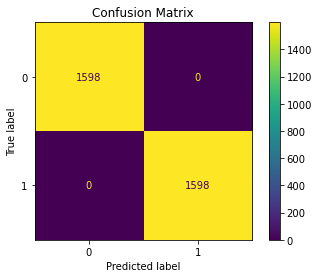

In [44]:
# best model
rf_tree = RandomForestClassifier(n_estimators = grid_rf.best_params_['n_estimators'],
                                criterion = grid_rf.best_params_['criterion'],
                                max_features = grid_rf.best_params_['max_features'],
                                min_samples_leaf= grid_rf.best_params_['min_samples_leaf'],
                                random_state = 123)

#fit
rf_tree.fit(X_train_clean, y_train)

# Predict
predicted_rf_train = rf_tree.predict(X_train_clean)

# evaluate
print(classification_report(y_train, predicted_rf_train))

cm = confusion_matrix(y_train, predicted_rf_train)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       400
           1       0.52      0.50      0.51       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656



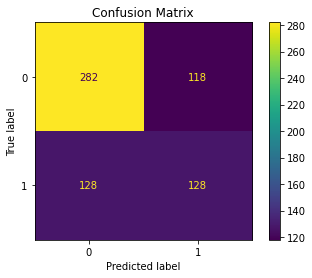

In [45]:
# predict test data
predicted_rf_test = rf_tree.predict(X_test_clean)

# evaluate
print(classification_report(y_test, predicted_rf_test))

cm = confusion_matrix(y_test, predicted_rf_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()
